# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [4]:
# student 1: inon karni 4041
# student 2:

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score

In [3]:

train_data = pd.read_csv('titanic_train.csv')
test_data = pd.read_csv('titanic_test.csv')

# הצגת 5 השורות הראשונות של כל dataset
print("Train Set - 5 Rows:")
print(train_data.head())
print("\nTest Set - 5 Rows:")
print(test_data.head())

Train Set - 5 Rows:
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       1    0  54.0      1      0  78.2667         1         1
1       2    0  45.0      0      0  13.5000         0         1
2       3    1  20.0      0      0   9.5000         0         0
3       3    1  36.0      0      0   7.8958         0         0
4       3    1  22.0      0      0   8.0500         0         0

Test Set - 5 Rows:
   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0       3    1  35.000000      0      0   7.0500         0         0
1       3    1  30.000000      0      0   7.2500         0         0
2       3    1  29.699118      0      0  14.5000         0         0
3       3    0  21.000000      0      0   7.7500         2         0
4       3    1  32.000000      0      0  56.4958         0         1



Train Set - Descriptive Statistics:
           Pclass         Sex         Age       SibSp       Parch        Fare  \
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000   
mean     2.294944    0.640449   29.531213    0.528090    0.384831   32.379429   
std      0.841990    0.480206   13.188028    1.055052    0.803085   49.836074   
min      1.000000    0.000000    0.670000    0.000000    0.000000    0.000000   
25%      1.750000    0.000000   22.000000    0.000000    0.000000    7.925000   
50%      3.000000    1.000000   29.699118    0.000000    0.000000   14.500000   
75%      3.000000    1.000000   35.000000    1.000000    0.000000   31.275000   
max      3.000000    1.000000   80.000000    8.000000    6.000000  512.329200   

         Embarked    Survived  
count  712.000000  712.000000  
mean     0.372191    0.394663  
std      0.649970    0.489122  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      

C:\Users\InonK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


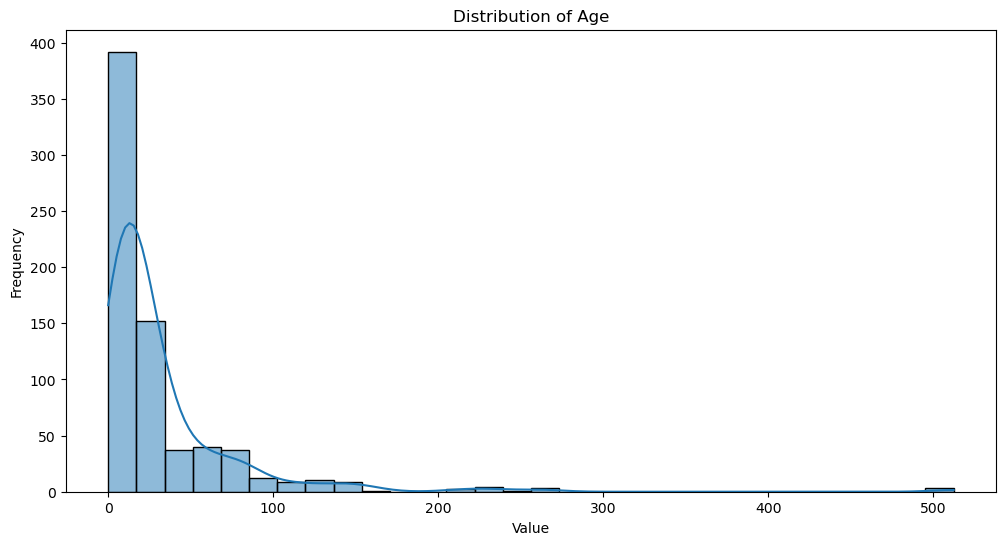

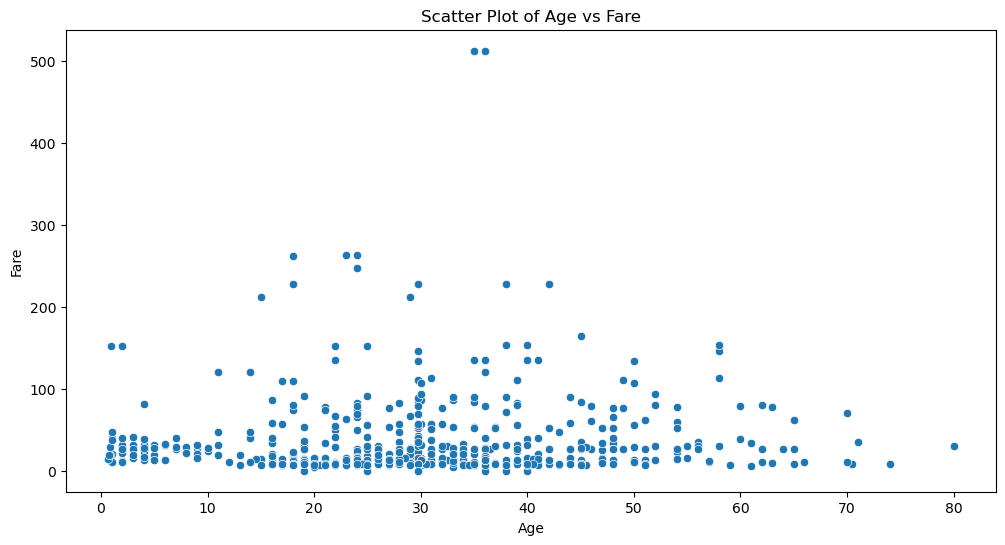

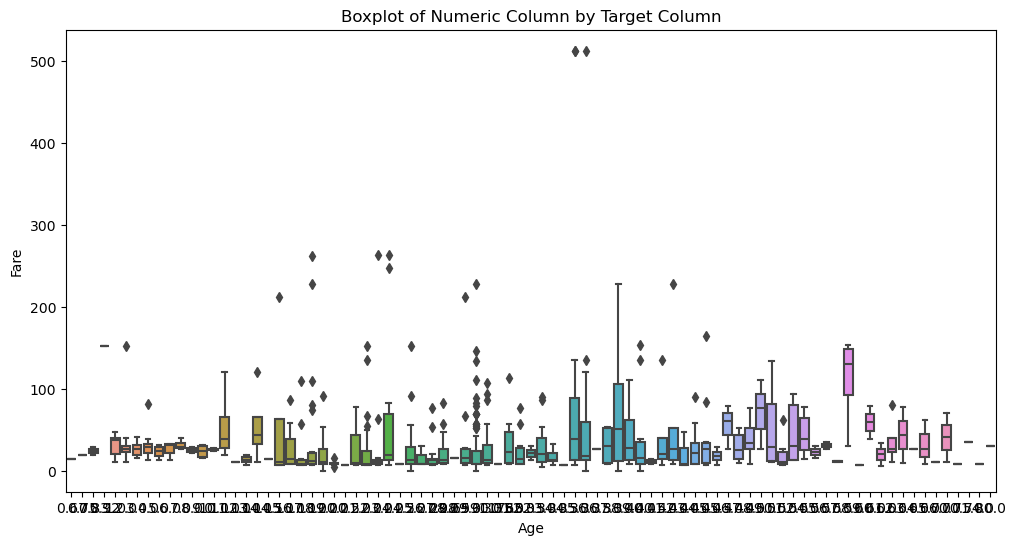

In [6]:
#EDA
print("\nTrain Set - Descriptive Statistics:")
print(train_data.describe())
print("\nTest Set - Descriptive Statistics:")
print(test_data.describe())

# 2. התפלגות עמודות (במקרה של נתונים קטגוריים)
print("\nTrain Set - Value Counts:")
print(train_data['Age'].value_counts())  

# 3. ויזואליזציה - היסטוגרמה
plt.figure(figsize=(12, 6))
sns.histplot(train_data['Fare'], bins=30, kde=True) 
plt.title('Distribution of Age')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# 4. ויזואליזציה - תרשים פיזור
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='Fare', data=train_data)  
plt.title('Scatter Plot of Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# 5. ויזואליזציה - קופסה
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age', y='Fare', data=train_data)  
plt.title('Boxplot of Numeric Column by Target Column')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(train_data.drop('Embarked', axis=1))  
y_train = train_data['Sex'] 
X_test = scaler.transform(test_data.drop('Embarked', axis=1))
y_test = test_data['Sex'] 

# הגדרת מודלים ו- Hyperparameters

# KNN
knn = KNeighborsClassifier()
knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

# Decision Tree
dt = DecisionTreeClassifier()
dt_params = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid Search עבור KNN
knn_grid = GridSearchCV(estimator=knn, param_grid=knn_params, cv=5, scoring='f1_macro', n_jobs=-1)
knn_grid.fit(X_train, y_train)
knn_best_model = knn_grid.best_estimator_
knn_best_params = knn_grid.best_params_
knn_best_score = knn_grid.best_score_

print("\nBest KNN Model Parameters:")
print(knn_best_params)
print("Best KNN Model F1 Score (Cross-Validation):", knn_best_score)

# Grid Search עבור Decision Tree
dt_grid = GridSearchCV(estimator=dt, param_grid=dt_params, cv=5, scoring='f1_macro', n_jobs=-1)
dt_grid.fit(X_train, y_train)
dt_best_model = dt_grid.best_estimator_
dt_best_params = dt_grid.best_params_
dt_best_score = dt_grid.best_score_

print("\nBest Decision Tree Model Parameters:")
print(dt_best_params)
print("Best Decision Tree Model F1 Score (Cross-Validation):", dt_best_score)

# הערכת הביצועים על נתוני הבדיקה
knn_y_pred = knn_best_model.predict(X_test)
dt_y_pred = dt_best_model.predict(X_test)

print("\nKNN Classification Report:")
print(classification_report(y_test, knn_y_pred))

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_y_pred))

# השוואת תוצאות
results = pd.DataFrame({
    'Model': ['KNN', 'Decision Tree'],
    'Best Params': [knn_best_params, dt_best_params],
    'Best Score (CV)': [knn_best_score, dt_best_score]
})

print("\nResults Summary:")
print(results)



Best KNN Model Parameters:
{'n_neighbors': 3, 'weights': 'uniform'}
Best KNN Model F1 Score (Cross-Validation): 0.9969593181519073

Best Decision Tree Model Parameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Decision Tree Model F1 Score (Cross-Validation): 1.0

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        58
           1       0.98      0.99      0.99       121

    accuracy                           0.98       179
   macro avg       0.98      0.98      0.98       179
weighted avg       0.98      0.98      0.98       179


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00       121

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1

Model trained with Decision Tree using the best hyperparameters.


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [14]:
X = train_data.drop(columns='Embarked') 
y = train_data['Sex']

# הגדרת ההנדסה של תכונות
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# הגדרת Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# הגדרת הפייפליין עם Decision Tree
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2))
])

# אימון המודל עם כל הנתונים
pipeline.fit(X, y)

# הצגת תוצאות
print("Model trained with Decision Tree using the best hyperparameters.")

Model trained with Decision Tree using the best hyperparameters.


## Part 5 - Apply on test and show model performance estimation

In [16]:
# הגדרת משתנים נפרדים לתכונות ולתוויות
X_test = test_data.drop(columns='Embarked')  
y_test = test_data['Sex']

# ביצוע חיזוי על ה-test set
y_pred = pipeline.predict(X_test)

# הצגת 5 תוצאות חיזוי ראשונות
print("First 5 predictions on the test set:")
print(pd.DataFrame({'Actual': y_test.head(), 'Predicted': y_pred[:5]}))

# הצגת דוח איכות המודל
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

# הצגת דיוק המודל
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

First 5 predictions on the test set:
   Actual  Predicted
0       1          1
1       1          1
2       1          1
3       0          0
4       1          1

Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        58
     Class 1       1.00      1.00      1.00       121

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179


Model Accuracy: 1.0000
